In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Questions

1. How many households use online payments or purchase groceries online?
2. What are the characteristics of those that do?
3. Those which don't, what are they like?

In [3]:
df = pd.read_parquet('../hces-2023-24/data/sec-4.1-FDQ.parquet')
df.head()

,used_ration_card,procured_rice,procured_wheat,procured_grain,procured_sugar,procured_pulses,procured_edible_oil,procured_other,online_groceries,online_milkprod,online_veg,online_fruits,online_dryfruits,online_eggfishmeat,online_processed_served,online_processed_packed,online_other,performed_ceremony,meals_served_to_nonhh,multiplier
hhid,,,,,,,,,,,,,,,,,,,,
22300101,no,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,no,5,57436
22300201,no,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,no,3,27497
22300202,no,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,no,2,27497
22300203,no,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,no,3,27497
22300204,no,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,no,3,27497


<Axes: >

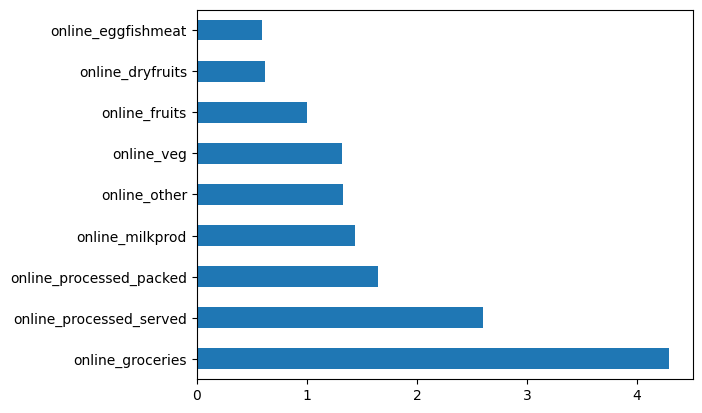

In [11]:
ol = [c for c in df if c.startswith('online_')]
scores = (df[ol].astype(int).values * df['multiplier'].values.reshape(-1, 1)).sum(axis=0) / df['multiplier'].sum()
pc_online = pd.Series(scores, index=ol).sort_values(ascending=False) * 100

pc_online.plot(kind='barh')

In [24]:
# What proportion of household used _any_ online shopping?
any_ol = df.index[df[ol].astype(int).sum(axis=1).astype(bool).values]
df.loc[any_ol, 'multiplier'].sum() / df['multiplier'].sum()

0.07095912262731743

In [26]:
hdf = pd.read_parquet('../hces-2023-24/data/sec-1-HCQ.parquet')
hdf['online'] = False
hdf.loc[any_ol, 'online'] = True

In [37]:
# Weighted cross-tabulation using sample weights
xx = pd.crosstab(hdf['sector'], hdf['online'], values=hdf['multiplier'], aggfunc='sum') / hdf['multiplier'].sum()
xx

online,False,True
sector,,
rural,0.647937,0.016454
urban,0.281103,0.054505


In [40]:
ohdf = hdf[hdf['online']]
ohdf.groupby('sector')['multiplier'].sum() / ohdf['multiplier'].sum()

sector
rural    0.231884
urban    0.768116
Name: multiplier, dtype: float64

In [42]:
# Almost three quarters of online shoppers are in cities!

In [43]:
ohdf.head()

,sector,state,district,multiplier,state_name,district_name,online
hhid,,,,,,,
46781312,rural,2,2,226490,Himachal Pradesh,Kangra,True
46781315,rural,2,2,226490,Himachal Pradesh,Kangra,True
46376201,rural,3,5,29147,Punjab,ShahidBhagat,True
46377309,rural,3,3,56445,Punjab,Jalandhar,True
46375202,rural,3,5,40358,Punjab,ShahidBhagat,True


In [47]:
state_online_pc = (ohdf.groupby('state_name')['multiplier'].sum() / ohdf['multiplier'].sum()).sort_values(ascending=False)
state_online_pc

state_name
Karnataka                             0.145341
Maharashtra                           0.138371
Delhi                                 0.138311
Telangana                             0.109858
Uttar Pradesh                         0.076688
West Bengal                           0.051229
Tamil Nadu                            0.048477
Gujarat                               0.039352
Kerala                                0.033928
Haryana                               0.032764
Madhya Pradesh                        0.031359
Bihar                                 0.029518
Punjab                                0.022692
Rajasthan                             0.017322
Chhattisgarh                          0.014351
Uttarakhand                           0.013310
Andhra Pradesh                        0.012119
Jharkhand                             0.010649
Assam                                 0.008975
Chandigarh                            0.008105
Odisha                                0.005934
Ma

In [52]:
state_online_pc.head(4).sum()

0.5318813980905339

In [53]:
# Half of the country's online grocery shopping is done in just four states - Karnataka, Maharashtra, Delhi and Telangana

In [54]:
hmdf = pd.read_parquet('../hces-2023-24/data/sec-3-HCQ.parquet')
hmdf.head()

rel_to_hoh  gender  age     marital_status  \
hhid     person_id                                                    
22300101 3          unmarried child    male   23      never married   
         2                   spouse  female   45  currently married   
         4          unmarried child  female   24      never married   
         1                     self    male   56  currently married   
22300201 2                   spouse  female   44  currently married   

                                  edu_level  edu_years used_internet  \
hhid     person_id                                                     
22300101 3                         graduate       18.0           yes   
         2                        secondary       10.0           yes   
         4          post graduate and above       20.0           yes   
         1                         graduate       15.0           yes   
22300201 2             upper primary/middle        8.0            no   

                    days_outside_home  meals_daily  meals_school  \
hhid     person_id                                                 
22300101 3                        0.0          3.0           NaN   
         2                        0.0          3.0           NaN   
         4                        0.0          3.0           NaN   
         1                        0.0          3.0           NaN   
22300201 2                        0.0          3.0           NaN   

                    meals_employer  meals_others  meals_payment  meals_home  \
hhid     person_id                                                            
22300101 3                     NaN           NaN            3.0        87.0   
         2                     NaN           3.0            NaN        87.0   
         4                     NaN           NaN            4.0        86.0   
         1                     NaN           NaN            3.0        87.0   
22300201 2                     NaN           NaN            NaN        90.0   

                    member_status  original_member  multiplier  
hhid     person_id                                              
22300101 3                      1              1.0       57436  
         2                      1              1.0       57436  
         4                      1              1.0       57436  
         1                      1              1.0       57436  
22300201 2                      1              1.0       27497

In [56]:
hmdf.index.get_level_values(0).nunique()

261953

In [66]:
hmdf['online'] = False
hmdf.loc[hmdf.index.get_level_values(0).isin(any_ol), 'online'] = True

In [67]:
hmdf.head()

rel_to_hoh  gender  age     marital_status  \
hhid     person_id                                                    
22300101 3          unmarried child    male   23      never married   
         2                   spouse  female   45  currently married   
         4          unmarried child  female   24      never married   
         1                     self    male   56  currently married   
22300201 2                   spouse  female   44  currently married   

                                  edu_level  edu_years used_internet  \
hhid     person_id                                                     
22300101 3                         graduate       18.0           yes   
         2                        secondary       10.0           yes   
         4          post graduate and above       20.0           yes   
         1                         graduate       15.0           yes   
22300201 2             upper primary/middle        8.0            no   

                    days_outside_home  meals_daily  meals_school  \
hhid     person_id                                                 
22300101 3                        0.0          3.0           NaN   
         2                        0.0          3.0           NaN   
         4                        0.0          3.0           NaN   
         1                        0.0          3.0           NaN   
22300201 2                        0.0          3.0           NaN   

                    meals_employer  meals_others  meals_payment  meals_home  \
hhid     person_id                                                            
22300101 3                     NaN           NaN            3.0        87.0   
         2                     NaN           3.0            NaN        87.0   
         4                     NaN           NaN            4.0        86.0   
         1                     NaN           NaN            3.0        87.0   
22300201 2                     NaN           NaN            NaN        90.0   

                    member_status  original_member  multiplier  online  
hhid     person_id                                                      
22300101 3                      1              1.0       57436   False  
         2                      1              1.0       57436   False  
         4                      1              1.0       57436   False  
         1                      1              1.0       57436   False  
22300201 2                      1              1.0       27497    True

In [ ]:
# Characteristics of households that use shopping vs non-shopping
# 1. Age of the HoH
# 2. Average age of the household
# 3. Highest education level of the household
# 4. Total years of education
# 5. Used internet in the last month

In [103]:
# 1.
hoh = hmdf[hmdf['rel_to_hoh'] == 'self']
hoh.groupby('online').apply(
    lambda g: (g['age'] * g['multiplier']).sum() / g['multiplier'].sum()
)
# -- no significant difference

online
False    48.379805
True     47.201425
dtype: float64

In [104]:
# 2. 
hmdf.groupby('online').apply(
    lambda g: (g['age'] * g['multiplier']).sum() / g['multiplier'].sum()
)
# -- nothing significant

online
False    31.258128
True     32.782747
dtype: float64

In [106]:
hmdf['edu_level'].unique()

array(['graduate', 'secondary', 'post graduate and above',
       'upper primary/middle', 'below primary', 'not literate',
       'higher secondary', 'primary',
       'diploma/certificate course (graduation & above)',
       'diploma/certificate course (up to secondary)',
       'diploma/certificate course (higher secondary)',
       'literate with non-formal education'], dtype=object)

In [107]:
education = pd.CategoricalDtype([
    'not literate', 'literate with non-formal education', 'below primary', 'primary', 
    'upper primary/middle', 'secondary', 'higher secondary', 
    'diploma/certificate course (up to secondary)', 
    'diploma/certificate course (higher secondary)',
    'diploma/certificate course (graduation & above)', 
    'graduate', 'post graduate and above'
], ordered=True)

In [110]:
hmdf['edu_level'] = hmdf['edu_level'].astype(education)

In [119]:
import seaborn as sns

/tmp/ipykernel_9634/1453289364.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu.groupby('edu_level').apply(lambda g: (g['online'] * g['multiplier']).sum() / g['multiplier'].sum()).sort_values().plot(kind='barh')


<Axes: ylabel='edu_level'>

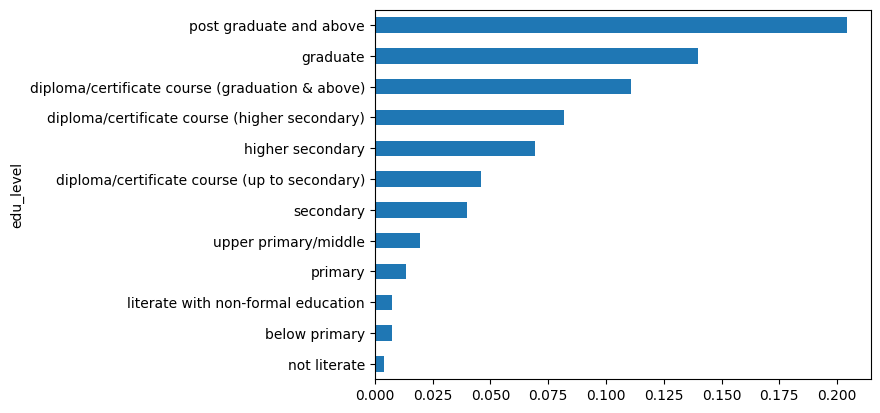

In [131]:
# 3.
g = hmdf.groupby(hmdf.index.get_level_values(0))
edu = pd.concat([
    g['edu_level'].max(),
    g['online'].first(),
    g['multiplier'].first()
], axis=1)
edu.groupby('edu_level').apply(lambda g: (g['online'] * g['multiplier']).sum() / g['multiplier'].sum()).sort_values().plot(kind='barh')
# -- probability of online shopping steadily increases with education

In [135]:
# 4.
used_internet = pd.CategoricalDtype(['no', 'yes'], ordered=True)
hmdf['used_internet'] = hmdf['used_internet'].astype(used_internet)
g = hmdf.groupby(hmdf.index.get_level_values(0))
internet = pd.concat([
    g['used_internet'].max(),
    g['online'].first(),
    g['multiplier'].first()
], axis=1)
internet.groupby('used_internet').apply(lambda g: (g['online'] * g['multiplier']).sum() / g['multiplier'].sum()).sort_values() * 100
# -- significant impact of internet use

/tmp/ipykernel_9634/15321164.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  internet.groupby('used_internet').apply(lambda g: (g['online'] * g['multiplier']).sum() / g['multiplier'].sum()).sort_values() * 100


used_internet
no     0.510819
yes    8.408325
dtype: float64

In [ ]:
# -- Those that don't use internet, where do their groceries come from?